In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
from utils import get_saved_data, get_binetflow_files, get_feature_labels
from binet_keras import keras_train_and_test

/usr/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
# summirize selected files [8, 9, 12]
summaries = []
best = [8, 9, 12]
binet_files = get_binetflow_files()
for i in best:
    summaries += get_saved_data(0.15, binet_files[i])
feature, label = get_feature_labels(summaries)

saved_data/saved_0.15s_17.pk1
saved_data/saved_0.15s_18.pk1
saved_data/saved_0.15s_15-3.pk1


In [3]:
# Initial train and test
f1, p, r = keras_train_and_test(feature, label)
scores = []
prec = []
rec = []
scores.append(f1)
prec.append(p)
rec.append(r)

In [4]:
# blur the data a bit, make it stronger each iteration and train/test again
for i in range(1, 11):
    indices = [random.randrange(len(feature)) for _ in range(int(len(feature) * ((i*10)/100)))]
    feats = feature[:]
    for index in indices: 
        feats[index]  = [feats[index][i] + np.random.normal(0, 1) for i in range(len(feats[index]))]
    f1, p, r = keras_train_and_test(feats, label)
    scores.append(f1)
    prec.append(p)
    rec.append(r)

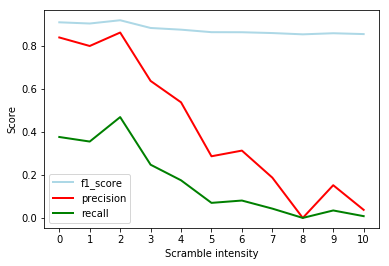

In [5]:
# plot the f1_score, precision and reall of each test iteration
plt.figure()
plt.plot(scores, "lightblue", lw=2, label="f1_score")
plt.plot(prec, color="red", lw=2, label="precision")
plt.plot(rec, color="green", lw=2, label="recall")
plt.xlabel("Scramble intensity")
plt.ylabel("Score")
plt.xticks(range(0, 11))
plt.legend(loc="best")
plt.show()